<a href="https://colab.research.google.com/github/MarianaUARG/DS-1/blob/main/tareaborradr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Abstract

Este proyecto utiliza el dataset “Sales - Retail Sales Dataset For Analysis” proveniente de Kaggle, que contiene las ventas de consumidores de distintas categorìas de productos de 2023. La base de datos incluye atributos críticos del cliente, como la edad y el sexo, junto con detalles de la transacción, como la categoría del producto, la cantidad comprada y el gasto total. Es ideal para analizar el comportamiento del consumidor, identificar tendencias de ventas y crear modelos de recomendación o pronóstico.

El objetivo de este proyecto es analizar las tendencias y patrones en las ventas para identificar oportunidades de mejora y optimizar la estrategia de ventas, respondiendo preguntas de interès sobre el dataset. Para ello se aplican técnicas de análisis univariado, bivariado y multivariado, utilizando herramientas como Matplotlib, Seaborn y pandas.

Se comienza con una limpieza básica y detección de valores faltantes, seguida de visualizaciones que permiten responder preguntas clave. Este análisis exploratorio permitirá sentar las bases para futuros trabajos de predicción, segmentación o comportamiento de consumidor


Preguntas e hipótesis de interés

1. ¿Cuál es la distribución de las ventas por región?
2. ¿Existe una relación entre el precio de los productos y las ventas?
3. ¿Cómo varían las ventas a lo largo del tiempo?
4. ¿Cuál es el impacto de la publicidad en las ventas?

Visualizaciones y Análisis

In [19]:
! git clone https://github.com/MarianaUARG/DS-1.git

Cloning into 'DS-1'...
remote: Enumerating objects: 15, done.
remote: Counting objects: 100% (15/15), done.
remote: Compressing objects: 100% (13/13), done.
remote: Total 15 (delta 3), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (15/15), 16.70 KiB | 8.35 MiB/s, done.
Resolving deltas: 100% (3/3), done.


In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar datos
df = pd.read_csv('/content/Sales Dataset.csv/Sales Dataset.csv')
df.head()

,Unnamed: 0,Date,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,0,2023-11-24,Male,34,Beauty,3,50,150
1,1,2023-02-27,Female,26,Clothing,2,500,1000
2,2,2023-01-13,Male,50,Electronics,1,30,30
3,3,2023-05-21,Male,37,Clothing,1,500,500
4,4,2023-05-06,Male,30,Beauty,2,50,100


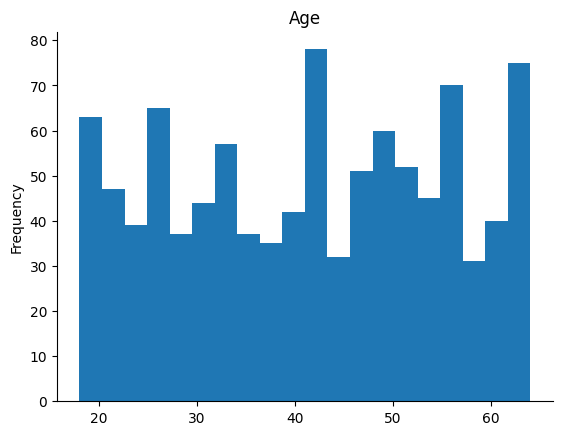

In [26]:
# @title Age

from matplotlib import pyplot as plt
df['Age'].plot(kind='hist', bins=20, title='Age')
plt.gca().spines[['top', 'right',]].set_visible(False)

Visualizaciones

Distribución de las ventas por región



analisis univariado

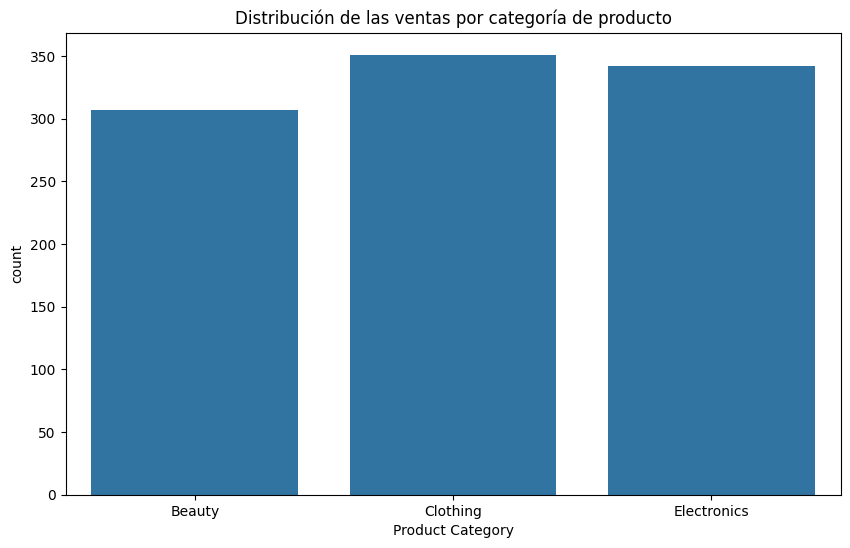

In [25]:
# Gráfico de barras para mostrar la distribución de las ventas por región
plt.figure(figsize=(10,6))
sns.countplot(x='Product Category', data=df)
plt.title('Distribución de las ventas por categoría de producto')
plt.show()

In [38]:
# Agrupar los datos por mes y calcular la suma de las ventas
df_monthly = df.groupby(df['Date'].dt.month)['Total Amount'].sum().reset_index()

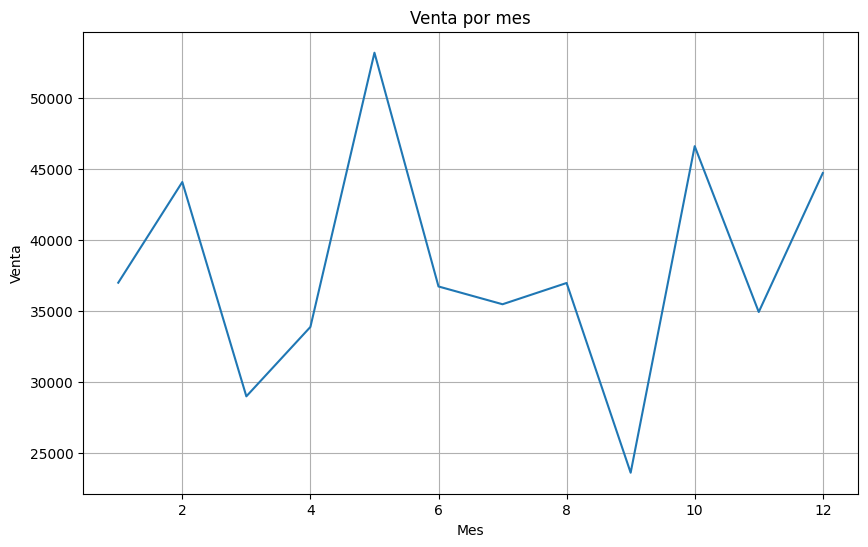

In [41]:
# Ventas por mes
plt.figure(figsize=(10,6))
plt.plot(df_monthly['Date'], df_monthly['Total Amount'])
plt.title('Venta por mes')
plt.xlabel('Mes')
plt.ylabel('Venta')
plt.grid(True)
plt.show()

In [ ]:
sns.countplot(x='gender', data=df)
plt.title('Cantidad de Películas vs Series')
plt.show()

Analisis multivariado
Cantidades vendidas por producto y género

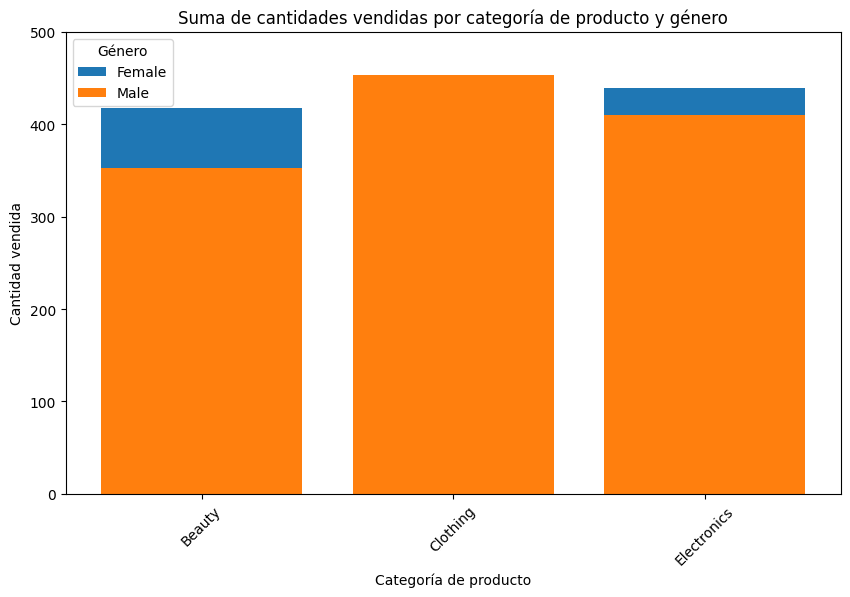

In [48]:
# Agrupar los datos por categoría de producto y género
df_grouped = df.groupby(['Product Category', 'Gender'])['Quantity'].sum().reset_index()

# Crear un gráfico de barras
plt.figure(figsize=(10,6))
for gender in df_grouped['Gender'].unique():
    df_gender = df_grouped[df_grouped['Gender'] == gender]
    plt.bar(df_gender['Product Category'], df_gender['Quantity'], label=gender)

plt.title('Suma de cantidades vendidas por categoría de producto y género')
plt.xlabel('Categoría de producto')
plt.ylabel('Cantidad vendida')
plt.legend(title='Género')
plt.xticks(rotation=45)
plt.ylim(0,500)
plt.show()

In [43]:
num_female = df[(df['Gender'] == 'Female') & (df['Product Category'] == 'Clothing')].shape[0]
print(f"Número de mujeres que compraron ropa: {num_female}")

Número de mujeres que compraron ropa: 174


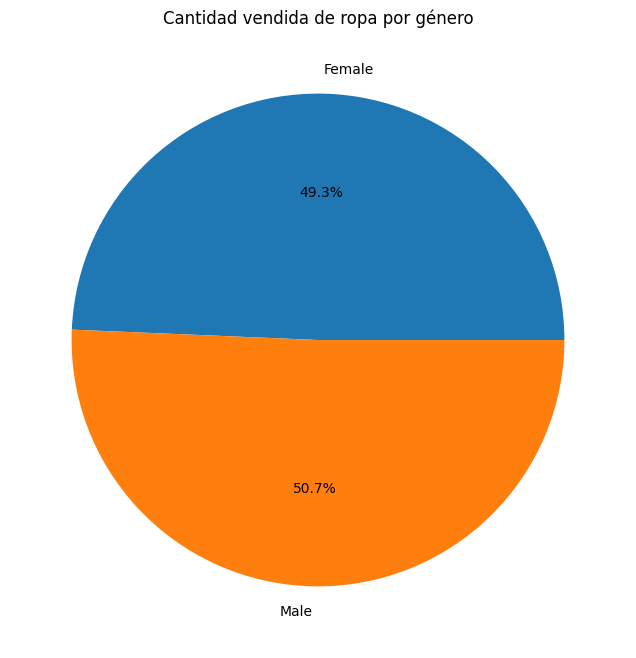

In [49]:
# Filtrar los datos para la categoría de producto Clothing
df_clothing = df[df['Product Category'] == 'Clothing']

# Agrupar los datos por género y calcular la suma de las cantidades vendidas
df_gender = df_clothing.groupby('Gender')['Quantity'].sum()

# Crear el gráfico de torta
plt.figure(figsize=(8,8))
plt.pie(df_gender, labels=df_gender.index, autopct='%1.1f%%')
plt.title('Cantidad vendida de ropa por género')
plt.show()